<h1>Cancer Classifier</h1>

<h1>Part 1: Load all the required libraries</h1>

In [10]:
#load the required libraries
library(party)
library(partykit)
library(devtools)
library(randomForest)
library(caret)

Loading required package: lattice


Loading required package: ggplot2



Attaching package: ‘ggplot2’



The following object is masked from ‘package:randomForest’:

    margin



<h1>Part 2: Read and prepare the dataset</h1><br>

In [2]:
#read the dataset
data <- read.delim("~/data.csv",header=T,sep=',')

#remove the NA column
data <- subset( #this function is used to subset a dataset
  data, #give it the data you want to subset
  select=-X #give it the feature that you want to include or exclude. - means exclude
  )

#remove the id column
data <- subset(
  data,
  select=-id
  )

#change the label to factor and move it to last column
diagnosis <- as.factor(data$diagnosis)
data <- subset(
  data,
  select=-diagnosis
  )
data$diagnosis <- diagnosis

head(data)


radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave.points_mean symmetry_mean fractal_dimension_mean ⋯ texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave.points_worst symmetry_worst fractal_dimension_worst diagnosis 
 
 17.99 10.38 122.80 1001.0 0.11840 0.27760 0.3001 0.14710 0.2419 0.07871 ⋯ 17.33 184.60 2019.0 0.1622 0.6656 0.7119 0.2654 0.4601 0.11890 M 
 20.57 17.77 132.90 1326.0 0.08474 0.07864 0.0869 0.07017 0.1812 0.05667 ⋯ 23.41 158.80 1956.0 0.1238 0.1866 0.2416 0.1860 0.2750 0.08902 M 
 19.69 21.25 130.00 1203.0 0.10960 0.15990 0.1974 0.12790 0.2069 0.05999 ⋯ 25.53 152.50 1709.0 0.1444 0.4245 0.4504 0.2430 0.3613 0.08758 M 
 11.42 20.38 77.58 386.1 0.14250 0.28390 0.2414 0.10520 0.2597 0.09744 ⋯ 26.50 98.87 567.7 0.2098 0.8663 0.6869 0.2575 0.6638 0.17300 M 
 20.29 14.34 135.10 1297.0 0.10030 0.13280 0.1980 0.10430 0.1809 0.05883 ⋯ 16.67 152.20 1575.0 0.1374 0.2050 0.4000 0.1625 0.2364 0.07678 M 
 12.45 15.70 82.57 477.1 0.12780 0.17000 0.1578 0.08089 0.2087 0.07613 ⋯ 23.75 103.40 741.6 0.1791 0.5249 0.5355 0.1741 0.3985 0.12440 M

<h1>Part 3: Prepare the train and test data</h1><br>

In [3]:
#split to train and test
idx <- sample.int( #this function generates a random set of integer numbers
  nrow(data), #the numbers you want to sample from
  nrow(data) * 0.7 #the numbers you want to sample
  )

train <- data[idx, ]  # keep the 70% sample. we will use this as a training set 
test  <- data[-idx, ] # discard the 70% sample, this leaves us with the rest 30% test set

#let's check the new dimensions of the train and test sets
dim(train)
dim(test)

#optional: scaling data
#train_scaled <- data.frame(scale(train[,1:30], scale=TRUE))
#train_scaled$diagnosis <- as.factor(train$diagnosis)
#scaled.new <- scale(new, center = mean(data), scale = sd(data)) #this will be useful if we test new unscaled data
#head(train)
#head(train_scaled)

398 
 31

171 
 31

<h1>Part 4a: Logistic Regression | Model Training</h1>

Now that we have created our training and testing datasets, we can start training our model. We will start with a simple logistic regression model using one feature<br>


In [4]:
#lets start by fitting one variable
model1 <- glm( #this function is short for generalized linear model
  diagnosis ~ radius_mean, #the regression formula (think Y=mX+b)
  data = train, #the data you are fitting the model on
  family = binomial #what type of regression? binomial is for logistic regression. If you don't specifiy, it will do linear regression
  )

#check the output of the model
summary(model1) #what is the p-value? the estimate? AIC? Residual Deviance?


Call:
glm(formula = diagnosis ~ radius_mean, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4735  -0.4527  -0.1456   0.1361   2.8655  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -15.3566     1.6072  -9.555   <2e-16 ***
radius_mean   1.0290     0.1119   9.200   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 523.17  on 397  degrees of freedom
Residual deviance: 223.77  on 396  degrees of freedom
AIC: 227.77

Number of Fisher Scoring iterations: 6


<h4>Now lets try to add another feature</h4>

In [5]:

model2 <- glm( #this function is short for generalized linear model
  diagnosis ~ radius_mean + texture_mean, #the regression formula (think Y=mX+b)
  data = train, #the data you are fitting the model on
  family = binomial #what type of regression? binomial is for logistic regression. If you don't specifiy, it will do linear regression
)

#check the output of the model
summary(model2) #what is the p-value? the estimate? AIC? Residual Deviance?


Call:
glm(formula = diagnosis ~ radius_mean + texture_mean, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0280  -0.3640  -0.1176   0.1032   2.7925  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -19.43883    2.08013  -9.345  < 2e-16 ***
radius_mean    1.03511    0.11899   8.699  < 2e-16 ***
texture_mean   0.20180    0.04352   4.637 3.53e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 523.17  on 397  degrees of freedom
Residual deviance: 200.01  on 395  degrees of freedom
AIC: 206.01

Number of Fisher Scoring iterations: 7


<h4>lets try one more feature</h4>


In [6]:
model3 <- glm( #this function is short for generalized linear model
  diagnosis ~ radius_mean + texture_mean + perimeter_mean, #the regression formula (think Y=mX+b)
  data = train, #the data you are fitting the model on
  family = binomial #what type of regression? binomial is for logistic regression. If you don't specifiy, it will do linear regression
)

#check the output of the model
summary(model3) #what is the p-value? the estimate? AIC? Residual Deviance?


Call:
glm(formula = diagnosis ~ radius_mean + texture_mean + perimeter_mean, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.10313  -0.23575  -0.08194   0.06157   3.14037  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -17.92977    2.37981  -7.534 4.92e-14 ***
radius_mean     -6.18087    1.19503  -5.172 2.31e-07 ***
texture_mean     0.22497    0.05435   4.139 3.49e-05 ***
perimeter_mean   1.08816    0.18610   5.847 5.00e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 523.17  on 397  degrees of freedom
Residual deviance: 146.06  on 394  degrees of freedom
AIC: 154.06

Number of Fisher Scoring iterations: 7


<h4>What happens if we fit all the features?</h4>


In [7]:
model4 <- glm( #this function is short for generalized linear model
  diagnosis ~ ., #the regression formula (think Y=mX+b). The . is a shortcut to represent all the features
  data = train, #the data you are fitting the model on
  family = binomial #what type of regression? binomial is for logistic regression. If you don't specifiy, it will do linear regression
)

#check the output of the model
summary(model4) #what is the p-value? the estimate? AIC? Residual Deviance?

Warning message:
“glm.fit: algorithm did not converge”

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = diagnosis ~ ., family = binomial, data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.326e-04  -2.000e-08  -2.000e-08   2.000e-08   5.132e-04  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)             -3.135e+02  1.824e+06   0.000    1.000
radius_mean             -1.700e+02  4.607e+05   0.000    1.000
texture_mean             1.614e+01  7.689e+03   0.002    0.998
perimeter_mean          -9.951e+00  5.647e+04   0.000    1.000
area_mean                1.001e+00  1.390e+03   0.001    0.999
smoothness_mean         -1.510e+03  4.299e+06   0.000    1.000
compactness_mean        -3.167e+03  2.812e+06  -0.001    0.999
concavity_mean           1.223e+03  1.656e+06   0.001    0.999
concave.points_mean      7.190e+03  1.858e+06   0.004    0.997
symmetry_mean            1.585e+03  2.449e+06   0.001    0.999
fractal_dimension_mean  -4.329e+03  1.345e+07   0.000    1.000
radius_se       

<h1>Part 4b: Logistic Regression | Prediction</h1>
Now that we have learned about the model fit and error profile, how good is each of the above models at predicting the test dataset? We will first try to use the model we trained in the previous section to predict the class in the test set.<br>


In [8]:
#now use the model we built to predict on test set
pred1.n <- predict( #this function helps us perform predictions 
  model1, #what model are you trying to use in prediction?
  test, #what dataset do you want to predict on?
  type = "response" #what type of prediction do you want to peform?
  )

#predictions are numerical. we need to split them to 2 classes (malignant and benign)
pred1.c <- ifelse(
  pred1.n > 0.5, #check if the probability is > 0.5 
  'M', #if true then assign malignant
  'B' #if false then assign benign
  )

#lets format the output by converting it to a factor variable
pred1.f <- factor(
  pred1.c,
  levels=c('B', 'M')
  )

#try the same for model 2 
pred2.n <- predict(
  model2,
  test,
  type = "response"
  )

pred2.c <- ifelse(
  pred2.n > 0.5,
  'M',
  'B'
  )

pred2.f <- factor(
  pred2.c,
  levels=c('B', 'M')
  )

#and model 3

pred3.n <- predict(
  model3,
  test,
  type = "response"
)

pred3.c <- ifelse(
  pred3.n > 0.5,
  'M',
  'B'
)

pred3.f <- factor(
  pred3.c,
  levels=c('B', 'M')
)

#and model 4
pred4.n <- predict(
  model4,
  test,
  type = "response"
)

pred4.c <- ifelse(
  pred4.n > 0.5,
  'M',
  'B'
)

pred4.f <- factor(
  pred4.c,
  levels=c('B', 'M')
)

#let's look at the M and B classes predicted per model
table(pred1.f)
table(pred2.f)
table(pred3.f)
table(pred4.f)


pred1.f
  B   M 
121  50 

pred2.f
  B   M 
122  49 

pred3.f
  B   M 
114  57 

pred4.f
  B   M 
103  68 

<h1>Part 4c: Logistic Regression | Accuracy</h1>

Lets try to quantify the accuracy of the predictions in the test set.

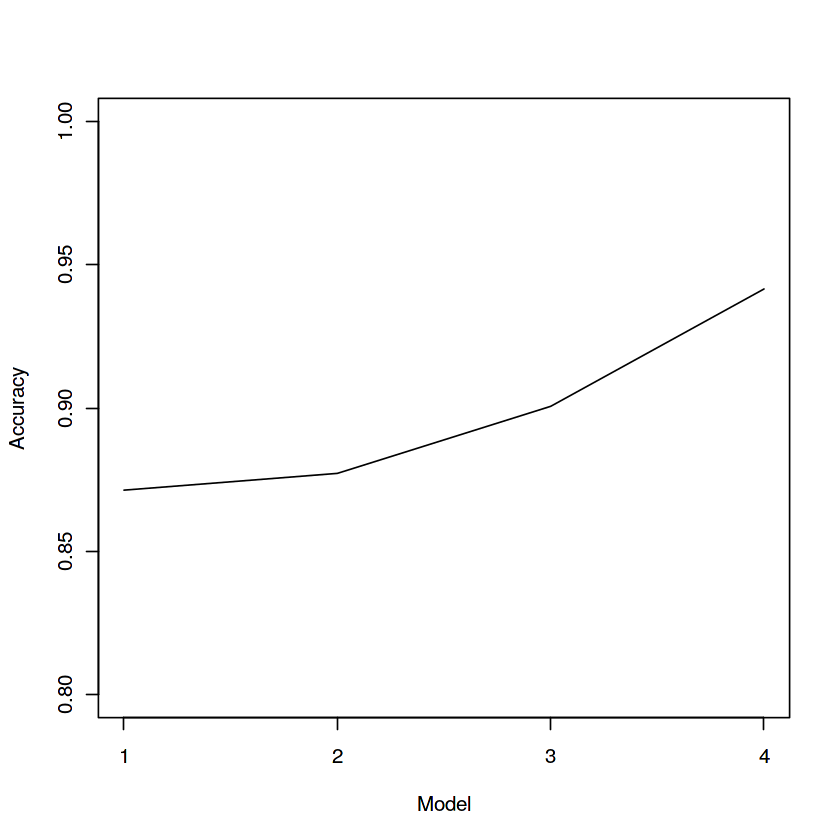

In [11]:
#compare predictions to truth and calculate accuracy
cm1 <- confusionMatrix( #function to generate confusion matrix
  test$diagnosis, #observed diagnosis in test set
  pred1.f #predicted diagnosis in test set
  )

accuracy1 <- cm1$overall[['Accuracy']] #pull the accuracy value from the confusion matrix output list

#model 2
cm2 <- confusionMatrix(
  test$diagnosis,
  pred2.f
  )

accuracy2 <- cm2$overall[['Accuracy']]

#model 3

cm3 <- confusionMatrix(
  test$diagnosis,
  pred3.f
)

accuracy3 <- cm3$overall[['Accuracy']]

#and model 4
cm4 <- confusionMatrix(
  test$diagnosis,
  pred4.f
)

accuracy4 <- cm4$overall[['Accuracy']]

#lets try to plot the accuracy for the 4 models
plot(
  c(accuracy1,accuracy2,accuracy3,accuracy4), #vector of accuracies
  ylim=c(0.8,1), #range of y-axis
  xlab="Model", #label of x-axis
  ylab="Accuracy", #label of y-axis
  type="l", #line plot instead of points
  xaxt="n" #remove x tick labels we can add our own
  )

#add our own x tick labels
axis(1, #x axis 2 is y axis
     at=1:4, #positions 1 to 4
     labels=1:4 #label them with 1 to 4 only 
     )

<h1>Part 5: Decision Trees</h1>

In this exercise, we will try to visualize a decision tree using an R library called "party"<br>

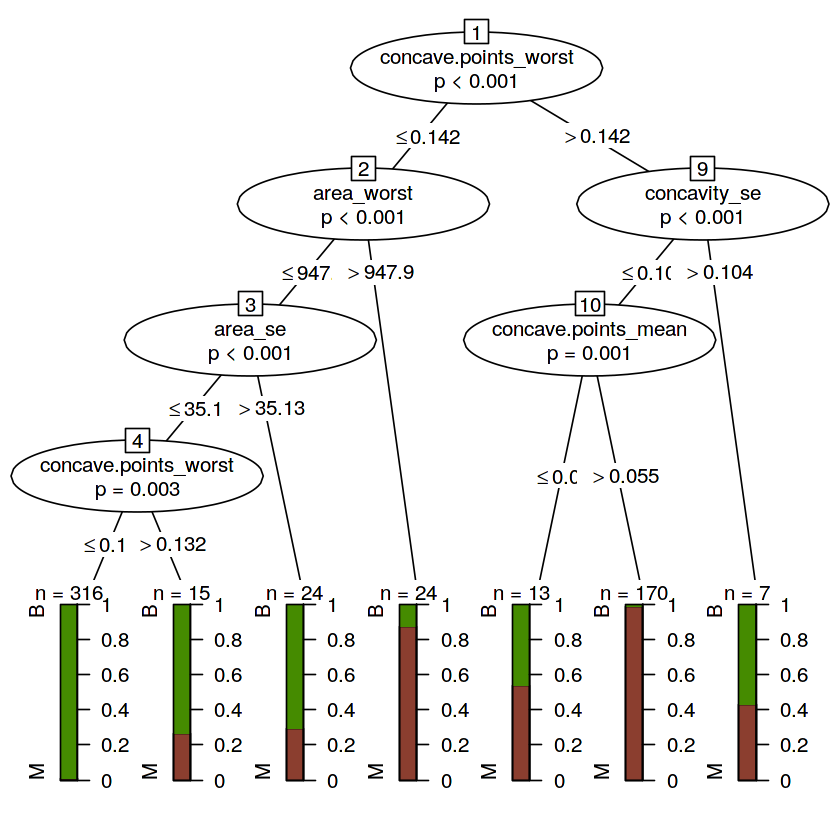

In [55]:
#plot decision tree
x <- ctree( #a function that can help us construct trees
  data$diagnosis ~ .,
  data=data
  )

plot(
  x, #the tree object we just generated above
  labels=FALSE, #don't add labels to the tree nodes
  terminal_panel=node_barplot( #generate a barplot at the bottom of the terminal nodes
    x,
    beside=FALSE,
    col="black",
    fill=c("coral4", "chartreuse4"),
    id=FALSE)
  )

<h1>Part 6a: Random Forest | Training </h1>

In the previous excercise, we visualized one decision tree. Random Forest is a collection of decision trees. Let's try to run a Random Forest by varying the number of decision trees. How does the number of decision trees affect the accuracy of the model?<br>



In [56]:
#lets build a forst with one tree
model5 <- randomForest(
  diagnosis ~ .,
  data=train,
  importance=TRUE,
  ntree=1
  )

#lets try 10 trees
model6 <- randomForest(
  diagnosis ~ .,
  data=train,
  importance=TRUE,
  ntree=10
)

#how about a 100?
model7 <- randomForest(
  diagnosis ~ .,
  data=train,
  importance=TRUE,
  ntree=100
)

#a 1000? I think you get the idea!
model8 <- randomForest(
  diagnosis ~ .,
  data=train,
  importance=TRUE,
  ntree=1000
)


<h1>Part 6b: Random Forest | Prediction </h1>
We can use the model we trained previously to predict on test set. We will use the same function we used in logistic regression to perform the prediction. 


In [57]:
pred5 <- predict(model5, test)
pred6 <- predict(model6, test)
pred7 <- predict(model7, test)
pred8 <- predict(model8, test)

#let's look at the number of B and M classes predicted by each model
table(pred5)
table(pred6)
table(pred7)
table(pred8)

pred5
  B   M 
112  59 

pred6
  B   M 
111  60 

pred7
  B   M 
111  60 

pred8
  B   M 
110  61 

<h1>Part 6c: Random Forest | Accuracy </h1>


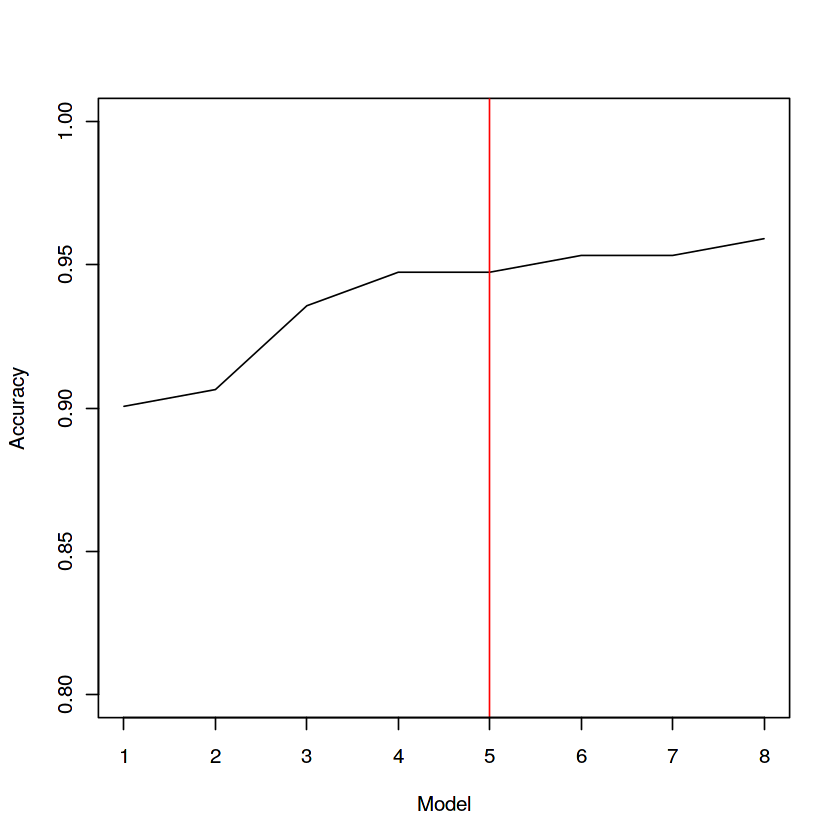

In [58]:
#generate confusion matrix for each model
cm5 <- confusionMatrix(pred5,test$diagnosis)
cm6 <- confusionMatrix(pred6,test$diagnosis)
cm7 <- confusionMatrix(pred7,test$diagnosis)
cm8 <- confusionMatrix(pred8,test$diagnosis)

#pull the accuracy for each model
accuracy5 <- cm5$overall[['Accuracy']]
accuracy6 <- cm6$overall[['Accuracy']]
accuracy7 <- cm7$overall[['Accuracy']]
accuracy8 <- cm8$overall[['Accuracy']]

#lets try to plot the accuracy for the 8 models so far
plot(
  c(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8), #vector of accuracies
  ylim=c(0.8,1), #range of y-axis
  xlab="Model", #label of x-axis
  ylab="Accuracy", #label of y-axis
  type="l", #line plot instead of points
  xaxt="n" #remove x tick labels we can add our own
)

#add a line that separates random forest from logistic
abline(v=5,col="red")

#add our own x tick labels
axis(1, #x axis 2 is y axis
     at=1:8, #positions 1 to 4
     labels=1:8 #label them with 1 to 4 only 
)

<h1>Part 6d: Random Forest | Importance Score </h1>


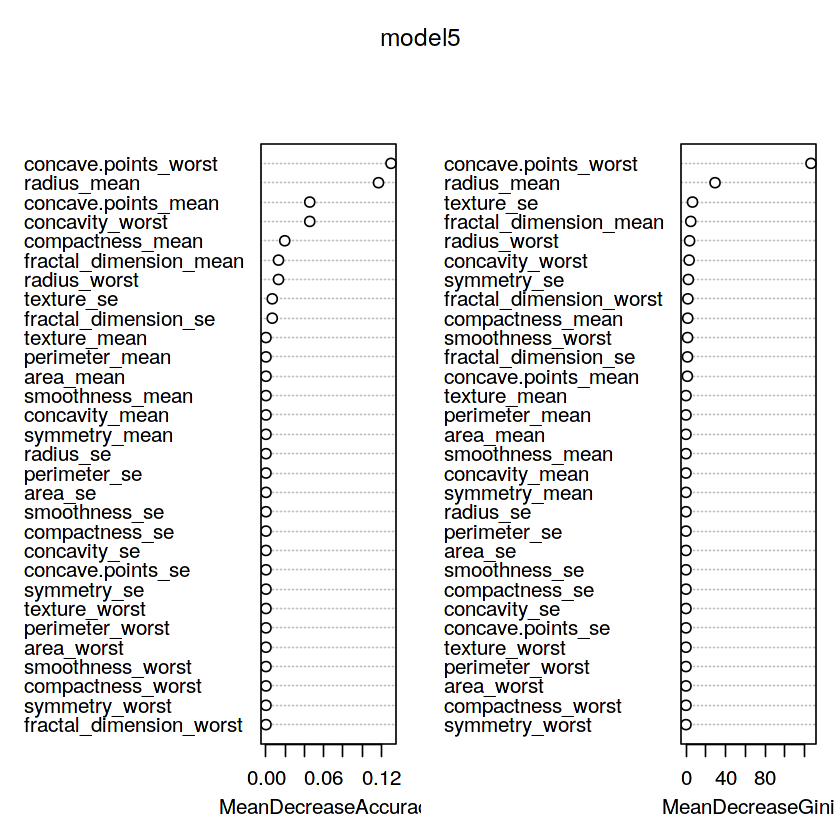

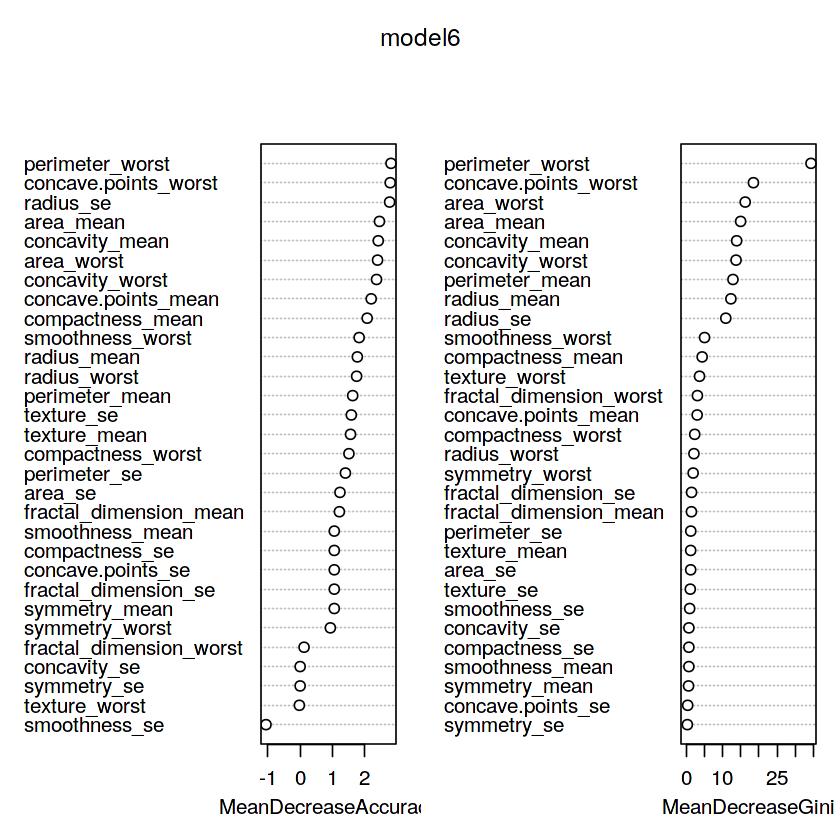

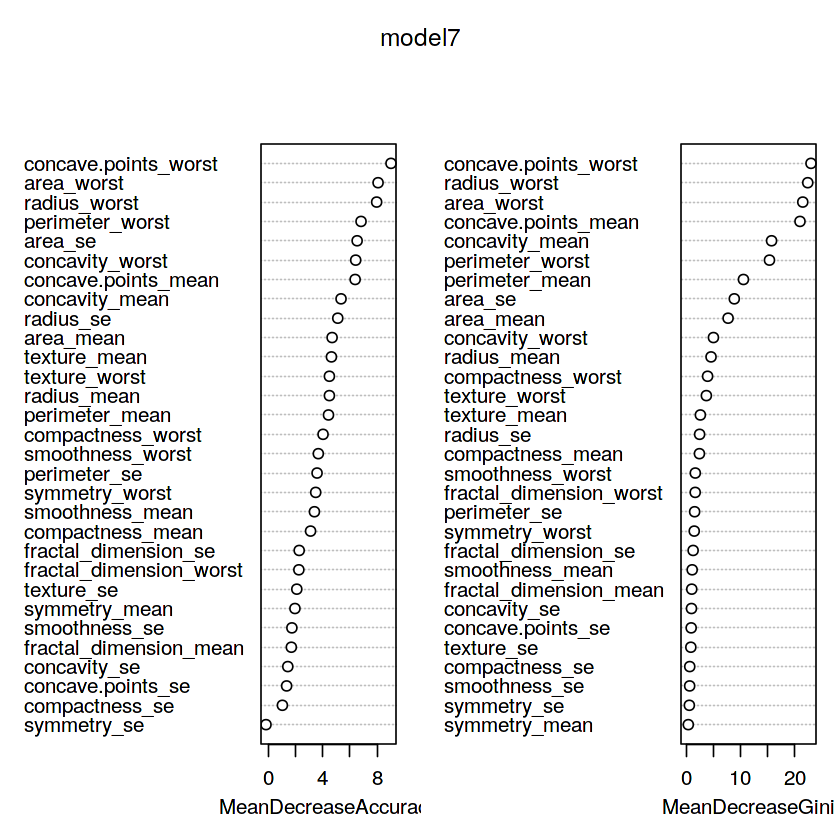

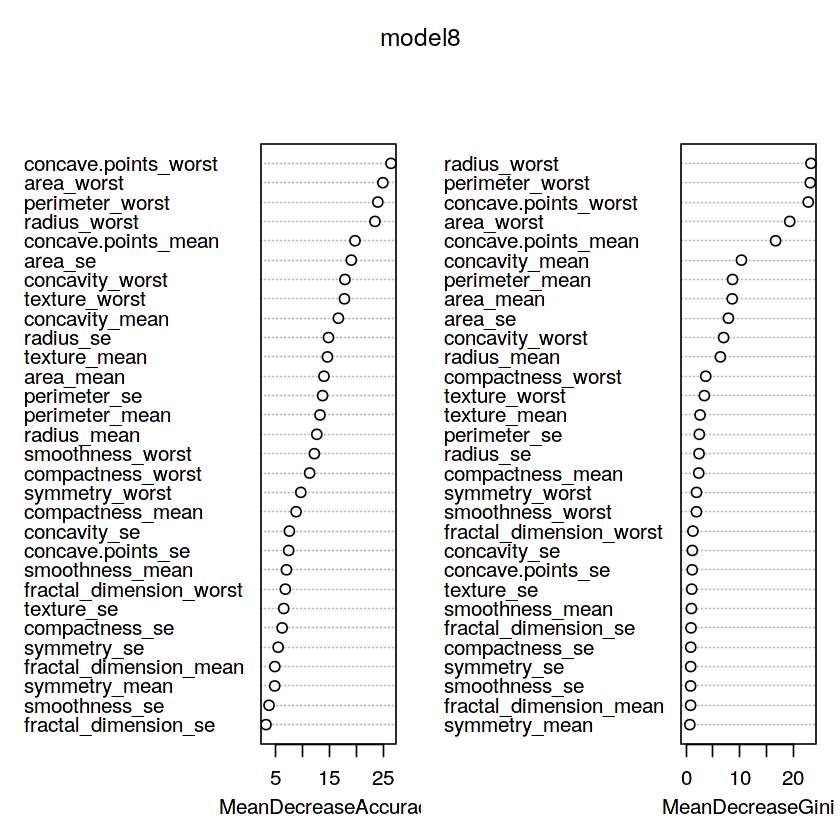

In [59]:
#can we visualize what features are important??
varImpPlot(model5)
varImpPlot(model6)
varImpPlot(model7)
varImpPlot(model8)
